**Copyright: © NexStream Technical Education LLC**.  
All rights reserved

# Implement the KNN class
In this project you will implement the K-nearest-neighbors algorithm to make predictions on unknown data points.  
First, you will create a class 'KNN' and implement the following methods.

<br>


Constructor:  
**def __init__(self, max_K=10):**  
- Inputs:  max_K = max iterations to search for K
- Initialize the following instance variables:  
     self.max_K = max_K  
     self.x_train = None  
     self.y_train = None  
     self.x_test = None  
     self.y_test = None  
     self.rmse = array of zeros of size max_K  

<br>

Split and scale the input dataset:  
**def split_scale(self, X, Y, test_size, split_seed):**
- Inputs:
  - X = indep variables
  - Y = dependent variables
  - test_size = percentage of the dataset split for the test data
  - split_seed = random seed for test purposes.
- Return: x_train, x_test (for test purposes), otherwise the instance variables x_train and x_test should be updated.
- Hint:  Implement the following: $$X_{scaled}=\frac{X-min(X)}{max(X)-min(X)} $$
- Hint:  (alternatively, scaling can be done using the following sklearn functions with feature_range set to [0,1]):  
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

<br>

Train the model using scikit-learn:  
**def train_model(self):**
- Inputs: None
- Return: rmse, K which minimizes the rmse
- Hints.  See the pseudo code below.  You may use the following sklearn functions.
      Loop over range of max_K neighbors. For each K:
        Fit the model with the train data
        Make predictions on the test data
        Calculate a score
        Calculate the RMSE
      Save best K to variable 'K'
  - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit
  - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.predict


<br>

Plot the costs:  
**def plot_rmse(self):**
- Inputs: None
- Return: None
- Hints:  Plot the RMSE vs. K stored in the training.


<br>

Predict the results:  
**def predict_result(self, df, df2, K, df3):**
- Inputs:
  - df = input dataset dataframe independent variables
  - df2 = test dataset dataframe independent variables
  - df3 = dependent variables (labels) from input dataset
  - K = number of neighbors to use in the prediction
- Return: Top K indices, predicted result
- Hints:
  - Scale the input data with the same scale factor used with the training data.
  - Set up an array to store the top K distances and their indices.
  - Find and store the distances from the K nearest points to the unknown point, where K is that which minimized the RMSE (best K for the model).
  - Sort the distances and indices in increasing order (smallest distance to largest distance).
  - Get the top K indices
  - Predict the unknown dependent variable by rounding the average of the sum of dependent labels provided for the K nearest neighbors.


Perform the steps as outlined in the following code cell to implement the following class constructor and methods.

In [92]:
#KNN class

#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt



class KNN:

  def __init__(self, max_K=10):
    #Define the following instance variables
    self.max_K = max_K
    self.x_train = None
    self.y_train = None
    self.x_test = None
    self.y_test = None
    self.x_train_scaler_min = None
    self.x_train_scaler_max = None
    self.rmse = [0.0] * max_K #array of zeros of size max_K

  def split_scale(self, X, Y, test_size, split_seed):

    #Scale dataframe before doing split
    #Save the input data (X) min and max so can scale the test data point
    #to the training data data during prediction
    scaler = MinMaxScaler(feature_range=(0, 1))


    #Scale the input independent vars (X)
    #Use the provided equation or MinMaxScaler with feature_range set to (0,1)
    X_scaled = scaler.fit_transform(X)
    self.x_train_scaler_min = scaler.data_min_
    self.x_train_scaler_max = scaler.data_max_

    #Split the dataset into train and test sets according to
    #the input paramaters test_size and split_seed. (see the text cell for hints).
    self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(X_scaled,Y, test_size=test_size, random_state=split_seed)

    #Convert back to pandas dataframe
    self.x_train = pd.DataFrame(self.x_train, columns=X.columns)
    self.x_test = pd.DataFrame(self.x_test, columns=X.columns)

    return self.x_train, self.x_test #return for testing purposes





  def train_model(self):
    #Fit the train data over range of K neighbors using KNN regression-based model.
    #   Loop over range of max_K neighbors. For each K:
    #      Fit the model with the train data (sklearn)
    #      Make predictions on the test data (sklearn)
    #      Calculate a score  (sklearn)
    #      Calculate and save the RMSE
    #   Save best K
    #Loop over a number of K neighbors (up to at least 10). For each K
    for n in range(1,self.max_K + 1):
      #Construct KNeighborsRegressor object with 'n' neighbors
      knnRegress = KNeighborsRegressor(n_neighbors=n)

      #Fit the model (using the train set)
      knnRegress.fit(self.x_train, self.y_train)

      #Make prediction estimates (using the test set)
      yhat = knnRegress.predict(self.x_test)

      #Calculate the RMSE and add to instance variable 'rmse' array
      self.rmse[n-1] = sqrt(mean_squared_error(self.y_test, yhat))

    #Save the best K as the index with the smallest cost (rmse)
    best_K = int(self.rmse.index(min(self.rmse)) + 1)

    return np.array(self.rmse), best_K


  def plot_rmse(self):
    #Plot the rmse vs. K using Matplotlib plotting functions
    #YOUR CODE HERE
    Ks = range(1, self.max_K + 1)
    plt.plot(Ks, self.rmse)
    plt.xlabel('K(Number of Neighbors)')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. K')
    plt.show()


# Inputs:
# df = input dataset dataframe independent variables
# df2 = test dataset dataframe independent variables
# df3 = dependent variables (labels) from input dataset
# K = number of neighbors to use in the prediction
# Return: Top K indices, predicted result
# Hints:
# Scale the input data with the same scale factor used with the training data.
# Set up an array to store the top K distances and their indices.
# Find and store the distances from the K nearest points to the unknown point, where K is that which minimized the RMSE (best K for the model).
# Sort the distances and indices in increasing order (smallest distance to largest distance).
# Get the top K indices
# Predict the unknown dependent variable by rounding the average of the sum of dependent labels provided for the K nearest neighbors.
  def predict_result(self, df, df2, K, df3):
    #Find the K nearest points to the unknown point
    #Calculate the distance from unknown point to all input points.
    #Use standard Euclidean distance formula.
    #Save distances to Numpy array.

    #Scale the data to the same as the training data
    #using the scaler_min and scaler_max you saved from the split_scale method.
    df_scaled = (df - self.x_train_scaler_min)/(self.x_train_scaler_max- self.x_train_scaler_min)
    df2_scaled =(df2 - self.x_train_scaler_min)/(self.x_train_scaler_max- self.x_train_scaler_min)

    #Init a numpy array of length = df
    dist = np.zeros(len(df))

    #Calculate the distance from unknown point to all input points.
    #Use standard Euclidean distance formula.
    #Save distances to dist array.
    dist = np.sqrt(np.sum((df_scaled.values - df2_scaled.values) ** 2, axis=1))

    #Sort distances so can extract the smallest K of them.
    dist_indices = np.argsort(dist)
    distSorted = dist[dist_indices]

    #Use "top" K for estimating the unknown data (K's with lowest cost)
    #Find the top K indices of the sorted distances.
    top_K_indices = dist_indices[:K]

    #Extract the known results data (from df3) from the K best distance indices,
    #and round the average over K points.
    pred_Result = float(round(df3.iloc[top_K_indices].mean()))


    return top_K_indices, pred_Result


# Assignment - Part 1



In this assignment, you will use KNN to create a classification model using a small "Physical statistics" dataset to predict a person's Activity Level.  

The cell below provides the raw data.

Perform the following steps as outlined in the following code cell.
- **Step 1:**  Read the PhysicalStats dataset (df), and Input dataset (df2) into a Pandas dataframe and print out the statistics
- **Step 2:**  Plot dataset to examine the relationship between the two indep
variables, 'Weight' and 'AvgSleep'.  You should see a plot like the following:  
![alt text](https://docs.google.com/uc?export=download&id=1fkIdRC-zUK1vpfU23f1_D9ske3rMr1Kq)  
Where the blue dots are the PhysicalStats and the red dot is the Input dataset. Note, the numeric annotations are the datapoint indices and have been added for clarity (i.e. you don't have to plot those)

<br>

- **Step 3:**  Instantiate a KNN object
- **Step 4:**  Scale the data and split into training and testing
Use 80% - 20% train-test split.  
- **Step 5:**  Train the KNN model using scikit-learn.  
- **Step 6:** Plot the RMSE vs. K.  Your plot should look like the following:  
![alt text](https://docs.google.com/uc?export=download&id=1GX02hJ575F8zU8PT9HWKOReMlJvMRb8h)  

- **Step 7:** Use the best K to predict the unknown data (lowest RMSE).

Make sure your code passes the doctests at the end of the cell.


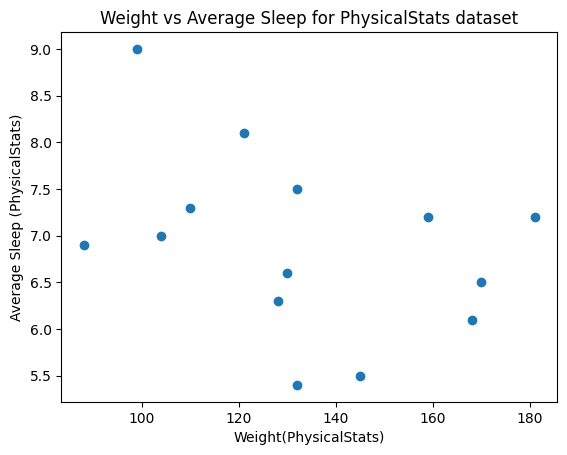

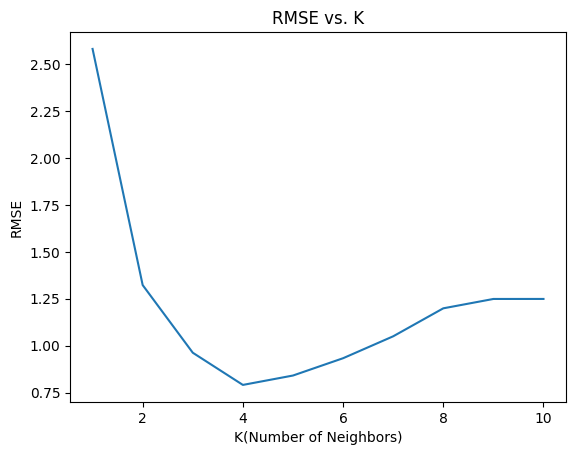

TestResults(failed=0, attempted=7)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

PhysicalStats = {
                'Height': [5.0,5.9,5.5,5.8,4.7,5.7,5.3,5.7,5.4,5.5,6.2,6.0,5.8,4.9],
                'Age': [45,26,30,34,40,36,19,22,23,32,35,25,18,20],
                'Gender': [0,1,1,0,1,1,0,0,0,1,0,1,0,0],
                'ActivityLevel': [1,4,2,4,3,2,4,2,2,3,4,1,1,0],
                'AvgSleep': [6.5,7.0,8.1,6.6,7.2,5.4,6.9,7.5,9.0,6.3,7.2,6.1,5.5,7.3],
                'Weight': [170,104,121,130,159,132,88,132,99,128,181,168,145,110]
                 }

Input = {
        'Height': [5.3],
        'Age': [39],
        'Gender': [1],
        'ActivityLevel': [float("NaN")],
        'AvgSleep': [6.1],
 	      'Weight': [158]
         }


#Step 1:  Read the PhysicalStats dataset (df), and Input dataset (df2) into a Pandas dataframe and examine the statistics
df = pd.DataFrame(PhysicalStats)
df2 = pd.DataFrame(Input)


#Step 2:  Plot dataset to examine the relationship between the two indep
#         variables, 'Weight' and 'AvgSleep'.
#YOUR CODE HERE
plt.scatter(df['Weight'], df['AvgSleep'])
plt.xlabel('Weight(PhysicalStats)')
plt.ylabel('Average Sleep (PhysicalStats)')
plt.title('Weight vs Average Sleep for PhysicalStats dataset')
plt.show()
#Step 3:  Instantiate a KNN object
knn = KNN(max_K=10)


#Step 4:  Create a training and test split of 80% train and 20% test from the dataset.
#         Use the features (X = independent variables), 'Weight' and 'AvgSleep'
#         and Y = dependent variable, 'ActivityLevel'.
#         Use a random_state (split_seed) of 3.

X = df[['Weight','AvgSleep']]    #indep vars
Y = df['ActivityLevel']    #dep var
knn.split_scale(X, Y, test_size=0.2, split_seed=3)   #Use 80/20 split and random state of 3


#Step 5: Train the model
RMSE, best_K = knn.train_model()


#Step 6:  Plot the costs (rmse's)
knn.plot_rmse()


#Step 7: Make predictions using the best K for estimating the unknown data (lowest RMSE).
#        Round your result.
input_df = df[['Weight','AvgSleep']]
test_df = df2[['Weight','AvgSleep']]


#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#1. original df 'Weight' indep var mean
#2. original df 'AvgSleep' indep var mean
#3. split and scaled X training data 'Height' (0th tuple element, column 0)
#4. split and scaled X testing data 'Age' (1st tuple element, column 1)
#5. RMSE minimum
#6. Best K value
#7. Predicted result
import doctest
"""
   >>> print(np.round(input_df['Weight'].mean(), 2))
   133.36
   >>> print(np.round(input_df['AvgSleep'].mean(), 2))
   6.9
   >>> print(np.round(knn.split_scale(X, Y, 0.2, 1)[0].iloc[:, 0].mean(), 2))
   0.54
   >>> print(np.round(knn.split_scale(X, Y, 0.2, 1)[1].iloc[:, 1].mean(), 2))
   0.44
   >>> print(np.round(RMSE.min(), 2))
   0.79
   >>> print(best_K)
   4
   >>> print(knn.predict_result(input_df[['Weight', 'AvgSleep']], test_df[['Weight', 'AvgSleep']], best_K, df['ActivityLevel']))
   (array([11,  0, 12,  4]), 2.0)
  """

doctest.testmod()

# Assignment - Part 2

In this project, you will use the provided dataset, **‘BreastCancerDataset_KNN_test.csv’** and predict a patient’s diagnosis result.  
The dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) and modified for this project (please use the provided dataset csv file).   
<br>

After creating your model, you will predict the diagnosis for a couple specific test cases.    
Record the Result and your best K value.    

input_1 =   
np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])  
**Your predicted value should be 1.0 (malignant)**

input_2 =  
np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])  
**Your predicted value should be 0.0 (benign)**   
<br>


Follow the same procedure to preprocess, train, and make predictions.  Round your result since it should be a one-hot output.

Perform the following steps as outlined in the following code cell.a

- **Step 1:**  Read the provided project csv file.
Upload the file to your Colab files folder so that you can access it
from your script. Read in the provided csv file: "BreastCancerDataset.csv"
into a pandas dataframe.  Note the dataset has been prepared to include all the features used in the study as well as a "Result" column.   
You MUST use this file in your project.  
- **Step 2:**  Inspect the dataset, note the features (indep vars) and the result (last column).
Hint:  use the Pandas 'drop' function to remove unwanted rows or columns from the dataframe.
- **Step 3:**  Read the features (all but the 'Result' column) into a numpy array.
Hint:  Create a column headers array and use that with the Pandas 'to_numpy()' function to create the independent variable X.
- **Step 4:**  Read the results column ('Result') into the Y variable
Hint:  Use the Pandas 'values' function or 'to_numpy()' to return a numpy representation of the Result column into a dependent variable Y
Make sure your code passes the doctests at the end of the cell.
- **Step 5:**  Instantiate a KNN object
- **Step 6:**  Create a training and test split of 80% train and 20% test from the dataset. Use a random_state of 1.
- **Step 7:**  Create the model
- **Step 8:**  Plot the costs (RMSE vs. K).  Your costs should look like the following:    
<br>

![alt text](https://docs.google.com/uc?export=download&id=1WEz84Zdr3kLFYAqnb1_HKM9nrc1MtWXM)

<br>

- **Step 9:** Use the best K for estimating the unknown data (lowest RMSE).

In [94]:
#Mount your google drive and copy the dataset to your working directory
#or change your directory to the folder containing the dataset
from google.colab import drive
drive.mount('/content/drive/')

#Copy (cp) the file to this directory or change directory (cd) to where your dataset is located.
None

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


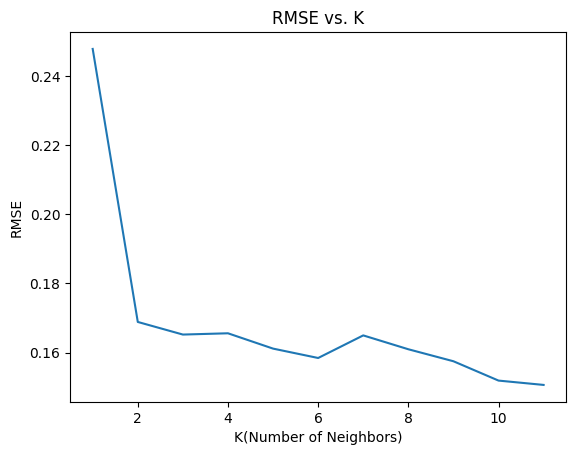

TestResults(failed=0, attempted=8)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

#Step 1:
#         Upload the file, 'BreastCancerDataset_KNN_test.csv' to your Colab files folder
#         so that you can access it from your script. You MUST use this file in your project.
#         Read the file into a pandas dataframe.  Note the dataset has been prepared to include all
#         the features used in the study as well as a "Result" column indicating the cancer diagnosis mapped
#         to a one-hot output (1 for malignant, 0 for benign).
#Step 2:  Inspect the dataset, note the features (indep vars) and the dependent variable, 'Result' (last column).
#         Remove unwanted rows or columns that are unnamed.
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
cancer_df = pd.read_csv('/content/drive/MyDrive/colabfiles/BreastCancerDataset_KNN_test.csv')
cancer_df = cancer_df.dropna()


#Step 3:  Read the features (all but the 'Result' column) into a numpy array.
#         Hint:  Create a column headers array and use that with the Pandas 'to_numpy()' function to create the independent variable X.
#Step 4:  Read the results column ('Result') into the Y variable
#         Hint:  Use the Pandas 'values' function or 'to_numpy()' to return a numpy representation of the Result column into a dependent variable Y
columnHeaders = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points',
                 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error',
                 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter',
                 'worst area', 'worst smoothness',  'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension' ]

X = cancer_df[columnHeaders]
Y = cancer_df['Result']


#Step 5:  Instantiate a KNN object
knn = KNN(max_K=11)

#Step 6:  Create a training and test split of 80% train and 20% test from the dataset. Use a random_state of 1.
knn.split_scale(X, Y, test_size=0.2, split_seed=1)


#Step 7:  Create the model
RMSE, best_K = knn.train_model()

#Step 8:  Plot the costs (rmse's)
knn.plot_rmse()
input_df = X.copy()

#Step 9:  Use the best K for estimating the unknown data (lowest RMSE).
input_df = input_df = pd.DataFrame(cancer_df, columns=columnHeaders)
#Test case 1
test_1 = np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])
test_df1 = pd.DataFrame(test_1.reshape(1, 30),columns=columnHeaders)
knn.predict_result(input_df, test_df1, best_K, cancer_df['Result'])

#Test case 2
test_2 = np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])
test_df2 = pd.DataFrame(test_2.reshape(1, 30),columns=columnHeaders)
knn.predict_result(input_df, test_df2, best_K, cancer_df['Result'])



#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#1. original df 'mean radius' indep var mean
#2. original df 'mean texture' indep var mean
#3. split and scaled X training data 'mean radius' (0th tuple element, column 0)
#4. split and scaled X testing data 'mean texture' (1st tuple element, column 1)
#5. RMSE minimum
#6. Best K value
#7. Predicted diagnosis result test input 1
input_df = pd.DataFrame(cancer_df, columns=columnHeaders)
test_1 = np.array([7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039])
test_df1 = pd.DataFrame(test_1.reshape(1, 30),columns=columnHeaders)
#8. Predicted diagnosis result test input 2
test_2 = np.array([19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])
test_df2 = pd.DataFrame(test_2.reshape(1, 30),columns=columnHeaders)

import doctest
"""
   >>> print(np.round(cancer_df['mean radius'].mean(), 2))
   14.13
   >>> print(np.round(cancer_df['mean texture'].mean(), 2))
   19.28
   >>> print(np.round(knn.split_scale(X, Y, 0.2, 1)[0].iloc[:, 0].mean(), 5))
   0.34304
   >>> print(np.round(knn.split_scale(X, Y, 0.2, 1)[1].iloc[:, 1].mean(), 5))
   0.31979
   >>> print(np.round(RMSE.min(), 2))
   0.15
   >>> print(best_K)
   11
   >>> print(knn.predict_result(input_df, test_df1, best_K, cancer_df['Result']))
   (array([549, 424, 230, 458, 304, 556, 547, 306, 177, 521,  49]), 1.0)
   >>> print(knn.predict_result(input_df, test_df2, best_K, cancer_df['Result']))
   (array([448,  22, 372,  55, 253, 217, 364,  69, 163, 498, 281]), 0.0)

  """

doctest.testmod()